In [1]:
import pandas as pd

with open("G:\My Drive\Institut Jozef Stefan\Projekti na Institutu\Določanje žanrov\Mapping to CORE\Corpora\cleaned_CORE_corpora.csv") as file:
    dataset_df = pd.read_csv(file)

dataset_df.head()

,label,text,split,GINCORE
0,NA NE,"Ferry consultation needs deeper questions, say...",train,News
1,ID DF,I'v been recording and mixing music for about ...,train,Forum
2,NA SR,The 25-year-old did have chances at Anfield. B...,train,News
3,NA NE,The value of NYC housing construction starts m...,train,News
4,ID DF,"If this is your first visit, be sure to check ...",train,Forum


In [2]:
dataset_df['text_length'] = dataset_df.text.str.split().str.len()

dataset_df.text_length.describe()

count     34848.000000
mean       1254.983672
std        3200.818999
min          52.000000
25%         343.750000
50%         642.000000
75%        1167.000000
max      118278.000000
Name: text_length, dtype: float64

In [4]:
final_dataset = dataset_df[["text","GINCORE"]]
final_dataset.columns = ["text", "labels"]

final_dataset.head()

,text,labels
0,"Ferry consultation needs deeper questions, say...",News
1,I'v been recording and mixing music for about ...,Forum
2,The 25-year-old did have chances at Anfield. B...,News
3,The value of NYC housing construction starts m...,News
4,"If this is your first visit, be sure to check ...",Forum


In [5]:
# Analyse the labels in CORE
print(final_dataset.labels.value_counts().to_markdown())

|                         |   labels |
|:------------------------|---------:|
| News                    |    12658 |
| Opinion/Argumentation   |     8980 |
| Information/Explanation |     3406 |
| Forum                   |     3108 |
| Review                  |     1687 |
| Instruction             |     1200 |
| Promotion               |     1026 |
| Research Article        |      804 |
| Lyrical                 |      636 |
| Interview               |      420 |
| Prose                   |      276 |
| FAQ                     |      272 |
| Legal/Regulation        |      186 |
| Recipe                  |      167 |
| Script/Drama            |       22 |


In [6]:
CORE_labels = list(final_dataset.labels.unique())

print(CORE_labels)

['News', 'Forum', 'Opinion/Argumentation', 'Review', 'Research Article', 'Information/Explanation', 'Lyrical', 'Promotion', 'Instruction', 'FAQ', 'Prose', 'Interview', 'Legal/Regulation', 'Recipe', 'Script/Drama']


In [7]:
# We won't use the labels that are not present in both datasets, and labels that have less than 5 instances in GINCO.
# This is the final set of labels that will be used.

LABELS = ['News', 'Forum', 'Opinion/Argumentation', 'Review', 'Research Article', 'Information/Explanation', 'Promotion', 'Instruction', 'Prose', 'Interview', 'Legal/Regulation', 'Recipe']

In [8]:
len(LABELS)

12

Let's remove instances that are labelled with discarded labels.

In [9]:
reduced_dataset = final_dataset[final_dataset["labels"].isin(LABELS)]

reduced_dataset.describe()

,text,labels
count,33918,33918
unique,33918,12
top,"Ferry consultation needs deeper questions, say...",News
freq,1,12658


In [10]:
reduced_dataset.labels.value_counts()

News                       12658
Opinion/Argumentation       8980
Information/Explanation     3406
Forum                       3108
Review                      1687
Instruction                 1200
Promotion                   1026
Research Article             804
Interview                    420
Prose                        276
Legal/Regulation             186
Recipe                       167
Name: labels, dtype: int64

In [11]:
# Analyse text length
reduced_dataset['text_length'] = reduced_dataset.text.str.split().str.len()

reduced_dataset.text_length.describe()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_1352\2681236152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_dataset['text_length'] = reduced_dataset.text.str.split().str.len()


count     33918.00000
mean       1266.38711
std        3229.96619
min          52.00000
25%         352.00000
50%         649.00000
75%        1175.00000
max      118278.00000
Name: text_length, dtype: float64

Create a stratified split. First split the dataset into train and devtest and then split the devtest into dev and test. The final split will be 60:20:20.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(reduced_dataset, test_size=0.4, random_state=42, shuffle = True, stratify = reduced_dataset.labels)

In [18]:
train.describe()

,text,labels
count,20350,20350
unique,20350,12
top,The Great Taxonomy of Literary Tumblrs: Round ...,News
freq,1,7594


In [19]:
devtest.labels.value_counts()

News                       5064
Opinion/Argumentation      3592
Information/Explanation    1363
Forum                      1243
Review                      675
Instruction                 480
Promotion                   410
Research Article            322
Interview                   168
Prose                       110
Legal/Regulation             74
Recipe                       67
Name: labels, dtype: int64

In [20]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

Observe the distribution of the labels in all sets.

<AxesSubplot:xlabel='value', ylabel='Count'>

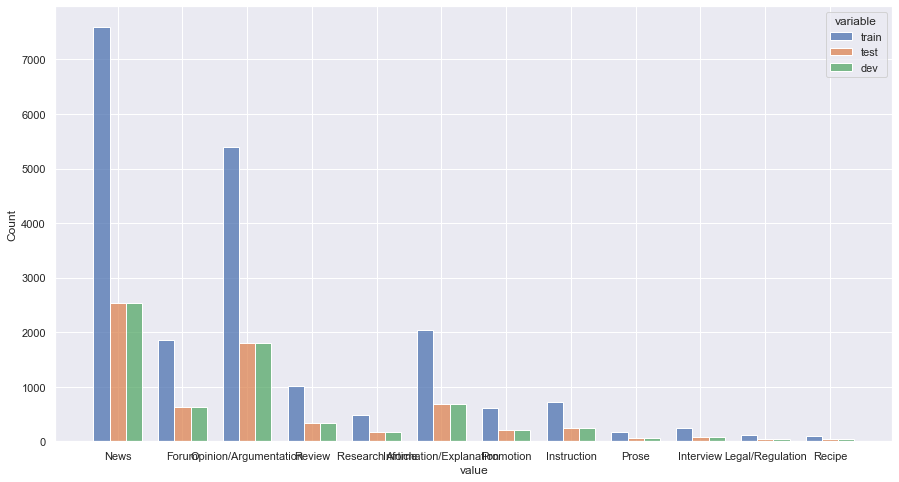

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)


In [22]:
df.describe()

,train,test,dev
count,20350,6784,6784
unique,12,12,12
top,News,News,News
freq,7594,2532,2532


Save the new files as csv

In [23]:
train.to_csv("CORE_final_train.csv", index=False)
test.to_csv("CORE_final_test.csv", index=False)
dev.to_csv("CORE_final_dev.csv", index=False)